In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [15]:
# Load dataset
data = pd.read_csv("train.csv")

# Check shape and head
print("Shape:", data.shape)
data.head()


Shape: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Missing values:
 label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


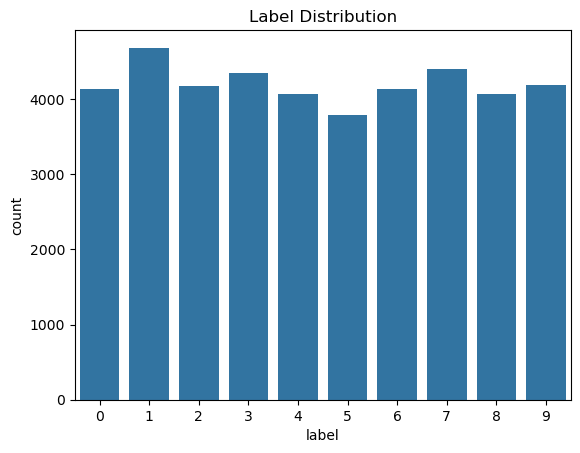

In [16]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Plot label distribution
sns.countplot(x='label', data=data)
plt.title("Label Distribution")
plt.show()


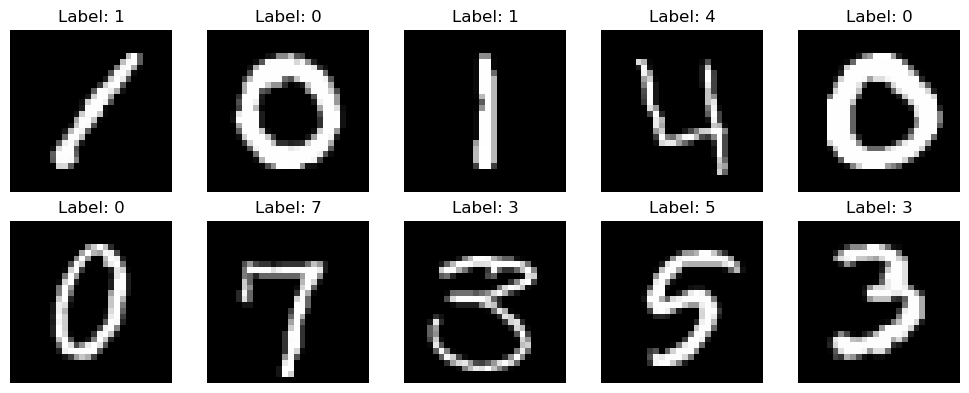

In [17]:
def plot_images(X, y, n=10):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        img = np.array(X.iloc[i]).reshape(28, 28)
        plt.subplot(2, 5, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(f"Label: {y.iloc[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(data.drop("label", axis=1), data["label"])


In [18]:
X = data.drop("label", axis=1)
y = data["label"]

# Normalize pixel values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, pred_knn)

# Show results
print("Logistic Regression Accuracy:", acc_lr)
print("Random Forest Accuracy:", acc_rf)
print("KNN Accuracy:", acc_knn)


Logistic Regression Accuracy: 0.9066666666666666
Random Forest Accuracy: 0.9620238095238095
KNN Accuracy: 0.9426190476190476


In [13]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "KNN"],
    "Accuracy": [acc_lr, acc_rf, acc_knn]
}

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy
0,Logistic Regression,0.906667
1,Random Forest,0.962024
2,KNN,0.942619


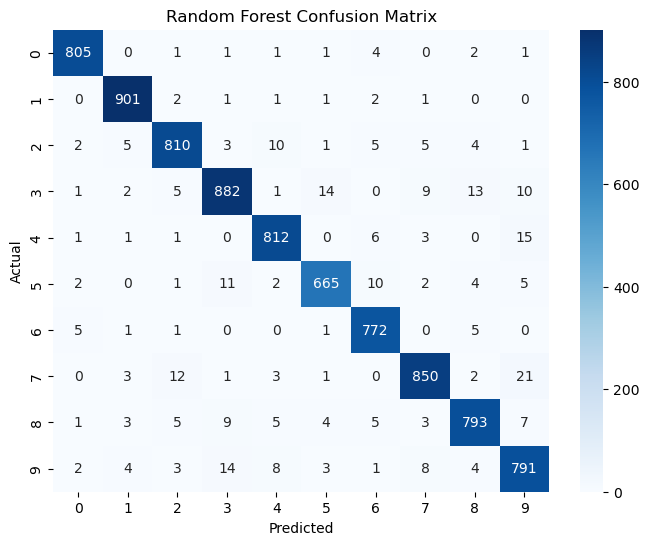

In [14]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

plot_conf_matrix(y_test, pred_rf, "Random Forest Confusion Matrix")
